In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [3]:
df = pd.read_csv('./data/2018.csv')

In [4]:
df.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


### Map countries to a region based on the 2016 dataset which contains both columns

In [5]:
for_mapping = pd.read_csv('./clean/2016.csv')

In [6]:
region_map = dict(for_mapping[['Country', 'Region']].values)
df['Region'] = df['Country or region'].map(region_map)
df.tail(10)
#Central African Republic is not mapped to a region!

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
146,147,Malawi,3.587,0.186,0.541,0.306,0.531,0.210,0.080,Sub-Saharan Africa
147,148,Haiti,3.582,0.315,0.714,0.289,0.025,0.392,0.104,Latin America and Caribbean
148,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030,Sub-Saharan Africa
149,150,Syria,3.462,0.689,0.382,0.539,0.088,0.376,0.144,Middle East and Northern Africa
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,Sub-Saharan Africa
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,Middle East and Northern Africa
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,Sub-Saharan Africa
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,Sub-Saharan Africa
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,NaN
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076,Sub-Saharan Africa


### Rename columns so they're consistent across notebooks

In [7]:
df = df.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score','GDP per capita':'Economy (GDP per Capita)', 'Social support':'Family','Healthy life expectancy':'Health (Life Expectancy)', 
               'Freedom to make life choices': 'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})

In [8]:
df.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe


In [9]:
df = df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Region']]

In [10]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe


### No dystopia column so I created one by subtracting the sum of Economy, GDP, Family, Generosity and Trust columns from the Happiness Score

In [15]:
df['Dystopia'] = df['Happiness Score'] - (df['Economy (GDP per Capita)']+ df['Family'] + df['Health (Life Expectancy)']
                                         + df['Freedom'] + df['Generosity'] + df['Trust (Government Corruption)'])
                                                                                

In [16]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,2.585
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,2.383
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,2.371
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe,2.426
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe,2.318


### Plot top 10 happiest countries

In [17]:
top10 = df.head(10)

In [18]:
top10.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,2.585
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,2.383


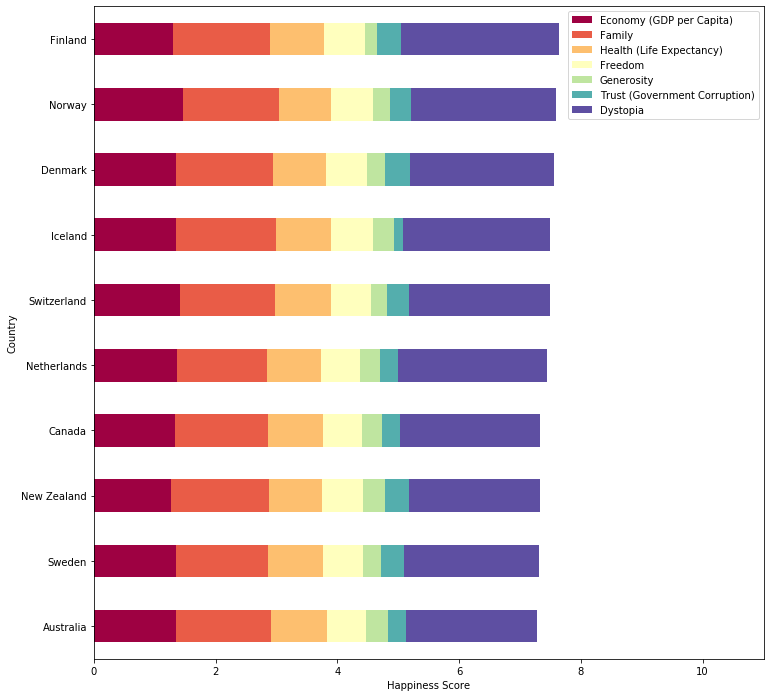

In [21]:
top10.sort_values('Happiness Score', ascending=True).plot(x='Country', 
            y=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
               'Trust (Government Corruption)', 'Dystopia'], 
                        kind='barh', stacked=True, figsize=(12,12), colormap='Spectral')
plt.xlabel('Happiness Score')
plt.xlim(0,11)
plt.legend(loc='upper right')

### Bottom 10 countries

In [22]:
bottom10 = df.tail(10)

In [23]:
bottom10

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia
146,Malawi,147,3.587,0.186,0.541,0.306,0.531,0.210,0.080,Sub-Saharan Africa,1.733
147,Haiti,148,3.582,0.315,0.714,0.289,0.025,0.392,0.104,Latin America and Caribbean,1.743
148,Liberia,149,3.495,0.076,0.858,0.267,0.419,0.206,0.030,Sub-Saharan Africa,1.639
149,Syria,150,3.462,0.689,0.382,0.539,0.088,0.376,0.144,Middle East and Northern Africa,1.244
150,Rwanda,151,3.408,0.332,0.896,0.400,0.636,0.200,0.444,Sub-Saharan Africa,0.500
151,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.083,0.064,Middle East and Northern Africa,1.106
152,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097,Sub-Saharan Africa,0.628
153,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.224,0.106,Sub-Saharan Africa,1.690
154,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038,NaN,2.488
155,Burundi,156,2.905,0.091,0.627,0.145,0.065,0.149,0.076,Sub-Saharan Africa,1.752


Text(0.5, 0, 'Happiness Score')

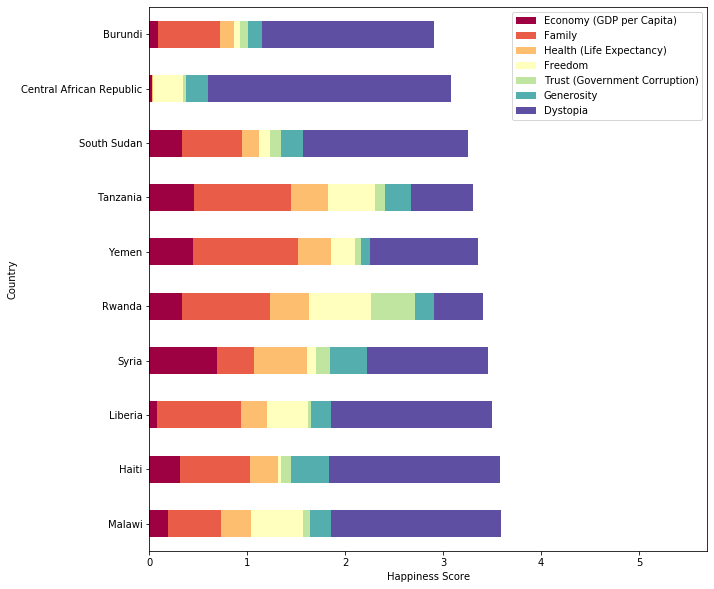

In [26]:
bottom10.sort_values('Happiness Rank', ascending=True).plot(x='Country', 
            y=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
               'Trust (Government Corruption)', 'Generosity', 'Dystopia'], 
                        kind='barh', stacked=True, figsize=(10,10), colormap='Spectral')
plt.xlim(0,5.7)
plt.legend(loc='upper right')
plt.xlabel('Happiness Score')

### Happiest/Unhappiest by Region

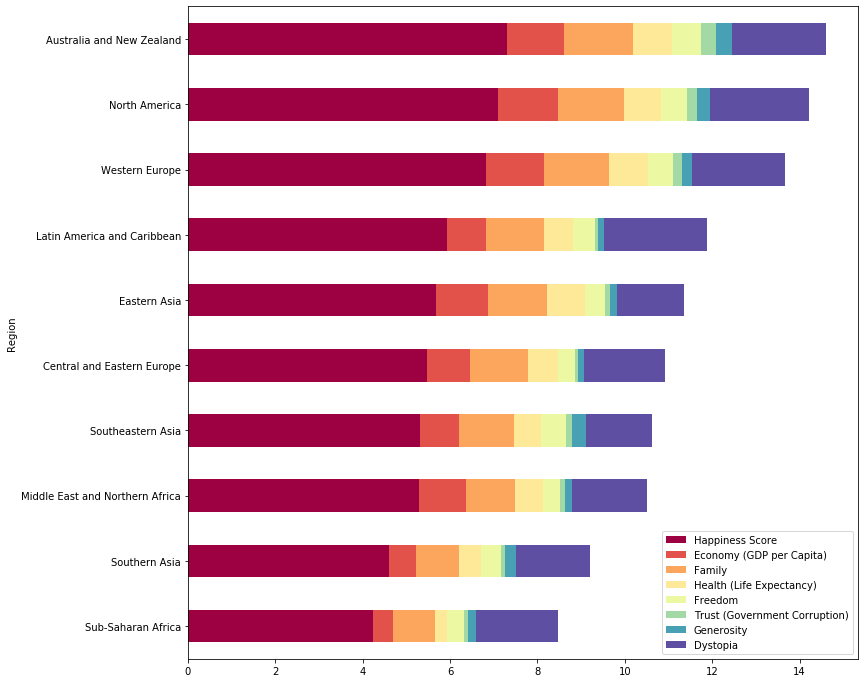

In [29]:
df.groupby('Region')['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
        'Freedom', 'Trust (Government Corruption)' ,'Generosity', 'Dystopia'].mean().sort_values(by='Happiness Score').plot(kind='barh', 
            stacked =True, figsize=(12,12), colormap='Spectral')

In [30]:
WE = df.loc[df.Region=='Western Europe']

Text(0, 0.5, 'Country')

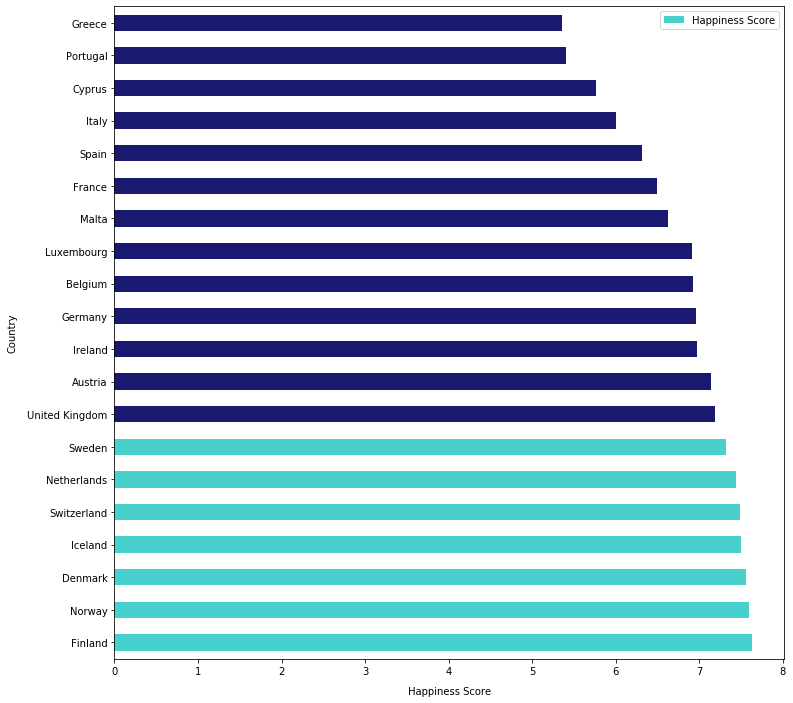

In [31]:
color=['mediumturquoise','mediumturquoise','mediumturquoise','mediumturquoise','mediumturquoise','mediumturquoise','mediumturquoise','midnightblue','midnightblue','midnightblue',
       'midnightblue', 'midnightblue','midnightblue','midnightblue','midnightblue', 'midnightblue','midnightblue','midnightblue',
      'midnightblue','midnightblue','midnightblue']
#firebrick', 'darksalmon','olivedrab', 'lightseagreen','darkorchid', 'royalblue', 'slategray', 'lavender',
      #'forestgreen', 'thistle', 'teal', 'tomato', 'powderblue']


WE.plot(y='Happiness Score', x='Country', kind='barh', color=color , figsize=(12,12))
plt.xlabel('Happiness Score', labelpad=10)
plt.ylabel('Country', labelpad=10)



In [32]:
ss_africa = df.loc[df['Region']=='Sub-Saharan Africa']

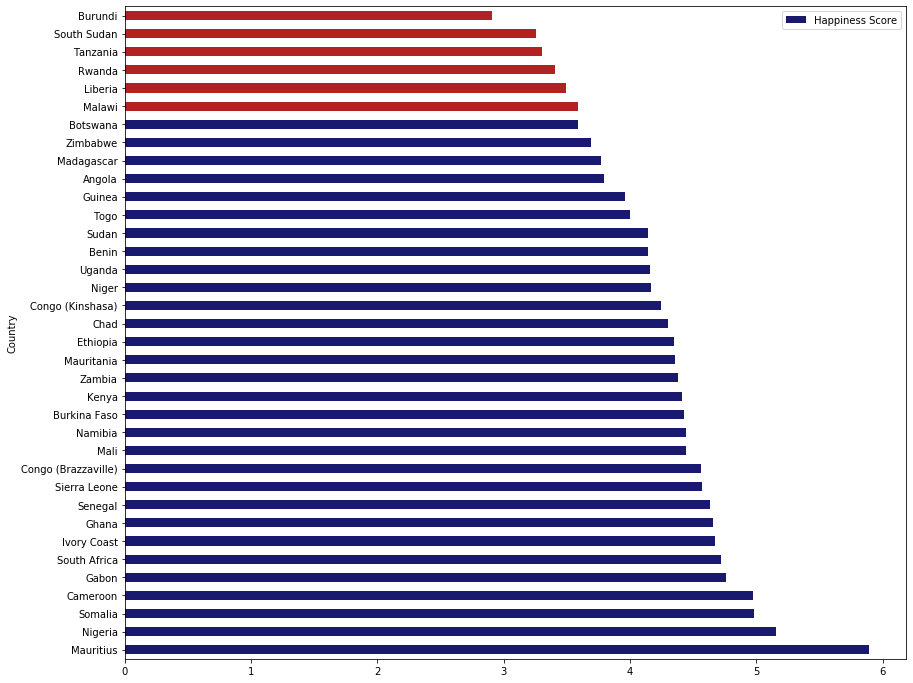

In [35]:
color2 = ['midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 
          'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 
          'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue',
          'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 
          'midnightblue', 'midnightblue', 'firebrick', 'firebrick', 
          'firebrick','firebrick','firebrick','firebrick','firebrick','firebrick','firebrick','firebrick' ]
          #,'midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue',
         #'midnightblue','midnightblue','midnightblue','midnightblue','midnightblue']
ss_africa.plot(y='Happiness Score', x='Country', kind='barh', color=color2 , figsize=(14,12))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

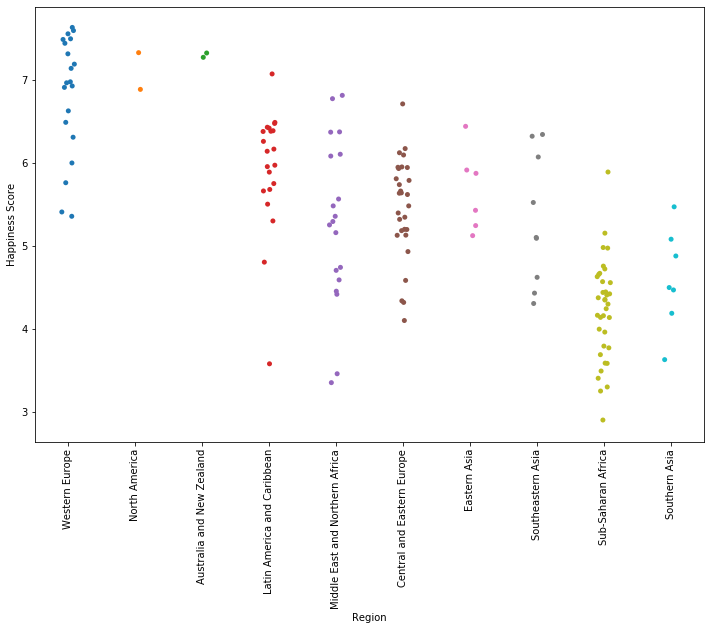

In [36]:
plt.figure(figsize=(12,8))
sns.stripplot(x='Region', y='Happiness Score', data=df, jitter=True)
plt.xticks(rotation=90)


### Create heatmap to see correlation between different variables

In [42]:
corr = df.iloc[:, 3:12]
corr.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia
0,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,2.585
1,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,2.383
2,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,2.371
3,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe,2.426
4,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe,2.318


In [43]:
corr_map = corr.corr()

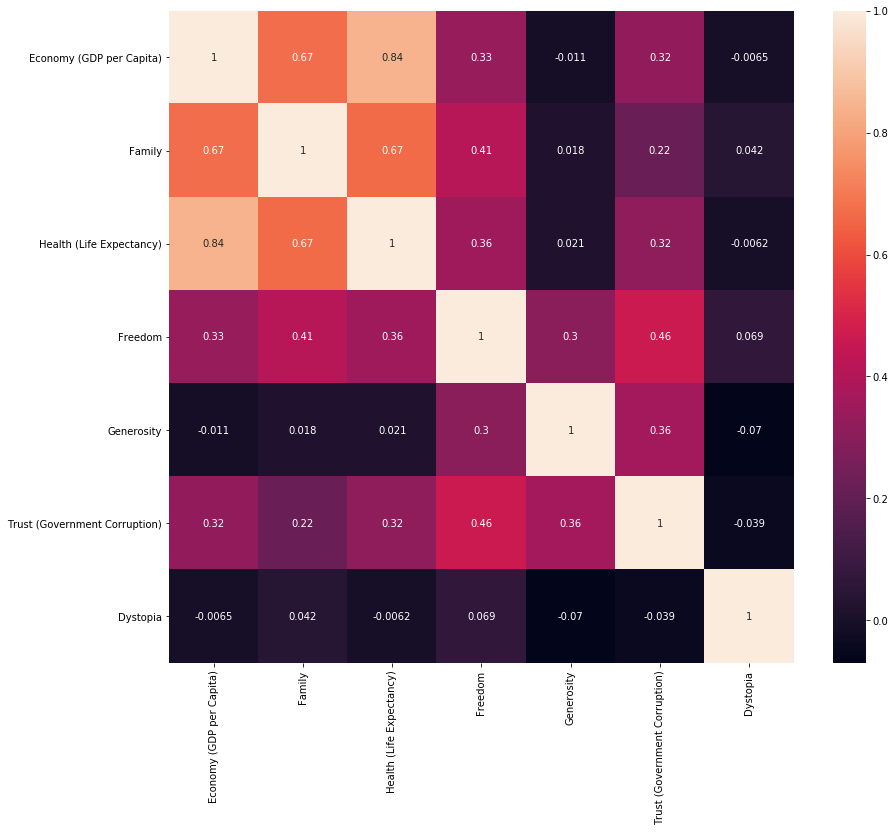

In [44]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_map, xticklabels=corr_map.columns, yticklabels=corr_map.columns, annot=True)

### Plot world happiness scores on a map

In [45]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [47]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'},
           colorscale = "Blues")
layout = dict(title = 'World Happiness 2018', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)
